<a href="https://colab.research.google.com/github/Valentino-Wanjiku/dsc-phase-1-project/blob/master/Valentino_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Overview**

This project focuses on using exploratory data analysis to provide strategic insights for Microsoft’s new movie studio initiative. As Microsoft enters the original video content market, the goal is to identify which types of films perform best at the box office.

Using datasets from IMDb and Box Office Mojo (imdb.title.basics, imdb.title.ratings, and bom.movie_gross), I will analyze industry trends related to genre, budget, ratings, and release timing. The findings will inform data-driven recommendations to help Microsoft make confident, well-informed production decisions.

**Tools and Libraries**

The following tools and libraries will be used throughout the project, each serving a specific purpose:

Pandas: For efficient data manipulation, cleaning, and analysis

NumPy: For handling numerical operations and computations

Matplotlib & Seaborn: For creating clear and informative visualizations to uncover trends and patterns in the data

**Importing the Libraries above:**

In [151]:
#loading Libraries to be used
import pandas as pd # This will import Pandas
import numpy as np # This will import Numpy
import matplotlib.pyplot as plt #This will import matplotlib
import seaborn as sns #This will import seaborn

**Data Collection and Preparation**

In [152]:
title_basics = pd.read_csv(r'/content/title.basics.csv')
title_ratings = pd.read_csv(r'/content/title.ratings.csv')  #Load the title ratings file
bom_movie_gross = pd.read_csv(r'/content/bom.movie_gross (1).csv') #Load the bom movie file

In [153]:
#Checkig the first five rows on ech data set
print("ttle_basic data")
print(title_basics.head(5))

print("bom_movie_gross data")
print(bom_movie_gross.head(5))

print("title_ratings data")
print(title_ratings.head(5))


ttle_basic data
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
bom_movie_gross data
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alic

**Examining the data structure and types to understand the format and composition of each dataset**

Getting to undersand number of rows and columns in our data set and the structure

In [154]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = bom_movie_gross.shape
print(f"The 'bom_movie_gross' dataset contains {num_rows} rows and {num_columns} columns.")

print("\nDataset Information:")
bom_movie_gross.info()

The 'bom_movie_gross' dataset contains 3387 rows and 5 columns.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [155]:
# Checking for data structure for title_basics file
num_rows, num_columns = title_basics.shape # this will give us the number of columns and raws
print(f"The title_basics dataset has {num_rows} rows and {num_columns} columns.")

title_basics_info = title_basics.info() # This will give us information of data types in our file title_basics
print(title_basics_info)

The title_basics dataset has 146144 rows and 6 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


**summary statistics for each data set**

Min: The smallest value in the column
25% (First Quartile): The value below which 25% of the data falls
50% (Median): The midpoint value, with 50% of the data below it
75% (Third Quartile): The value below which 75% of the data falls
Max: The largest value in the column
Count: Total number of non-null (non-missing) values in each column
Mean: The average of all numeric values in a column
Standard Deviation (std): Indicates how much the values in a column vary from the mean


In [156]:
#summary statistics for each data set
print("ttle_basic data")
print(title_basics.head())

print("bom_movie_gross data")
print(bom_movie_gross.head())

print("title_ratings data")
print(title_ratings.head())

ttle_basic data
      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
bom_movie_gross data
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alic

**Checking for any Missing Values in our data sets**

In [157]:
# Check for missing values in the 'bom_movie_gross' dataset
missing_values = bom_movie_gross.isnull().sum()
print(missing_values)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


studio: 5 missing values
Domestic_gross: 28 missing values
Foreign_gross: 1350 missing values (currently an object, should be numeric)

In [158]:
title_ratings.isnull().sum()

,0
tconst,0
averagerating,0
numvotes,0


No missng values in this adata set

In [159]:
title_basics.isnull().sum()

,0
tconst,0
primary_title,1
original_title,22
start_year,0
runtime_minutes,31739
genres,5408


Original_title: 22 missing values

Runtime_minutes: 31,739 missing values

Genres: 5,408 missing values

Cleaning our first data set (**Title Basics)**

In [180]:
# Fill missing 'runtime_minutes' with the median runtime
runtime_median = title_basics['runtime_minutes'].median()
title_basics['runtime_minutes'].fillna(runtime_median)

# Fill missing 'genres' with 'Unknown'
title_basics['genres'].fillna('Unknown')

# Drop rows where 'original_title' is missing
title_basics_cleaned = title_basics.dropna(subset=['original_title'])

# Display summary of the cleaned dataset
print("Summary of cleaned 'title_basics' dataset:")
title_basics_cleaned.head()

# Display the first few rows of the cleaned data
print('First few ros of cleaned Title Basics')
title_basics_cleaned.head()


Summary of cleaned 'title_basics' dataset:
First few ros of cleaned Title Basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Cleaning our 2nd data set (**Bom Movie**)

In [161]:
# Convert 'foreign_gross' column to numeric, setting invalid parsing as NaN
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

# Drop rows with missing values in 'studio' or 'domestic_gross'
bom_movie_cleaned = bom_movie_gross.dropna(subset=['studio', 'domestic_gross'])

# Display summary of the cleaned dataset
print("Summary of cleaned 'bom_movie_gross' dataset:")
bom_movie_cleaned.info()

# Display the first few rows of the cleaned data
print('First few rows of cleaned Bom Movie')
bom_movie_cleaned.head()

Summary of cleaned 'bom_movie_gross' dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2002 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB
First few rows of cleaned Bom Movie


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


**Merge title_basics and title_rating Data sets since they have the same common column tconst**

In [162]:
# Merge title_basics and title_ratings on 'tconst'
merged_data = pd.merge(title_basics_cleaned, title_ratings, on='tconst', how='inner')

# Display summary of the merged dataset
print("Summary of merged dataset:")
merged_data.info()

# Show the first few rows
print('First rows of the merged data') #and 'Last row of the merged data')
merged_data.head()
#merged_data.tail()


Summary of merged dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
First rows of the merged data


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


**Results of Data Cleaning and Merging**

After cleaning the individual datasets, I merged title_basics and title_ratings using their common key, tconst. This merge combined essential movie details (such as runtime, genres, and titles) with their corresponding ratings.

Reduced missing data: By filling missing values in runtime_minutes and genres and dropping rows missing critical fields like original_title, the dataset became more complete and reliable.

Consistent and clean data: Numeric fields like foreign_gross were converted properly, and invalid values were handled, ensuring accurate analysis.

**Perorming Exploratory Data Analysis (EDA) and Visualization**

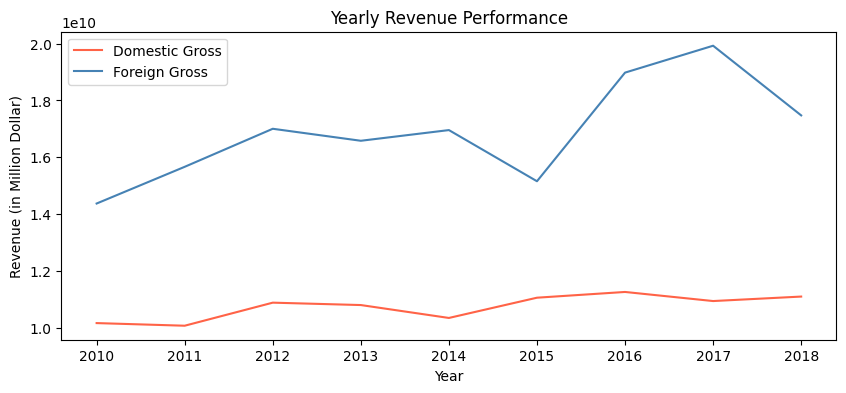

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by year and calculate total domestic and foreign gross revenue
total_gross_by_year = bom_movie_cleaned.groupby('year')[['domestic_gross', 'foreign_gross']].sum().reset_index()# added demestic and foregn together

# Plot total gross revenue by year
plt.figure(figsize=(10, 4))
sns.lineplot(data = total_gross_by_year, x='year', y='domestic_gross', label='Domestic Gross', color='tomato')
sns.lineplot(data = total_gross_by_year, x='year', y='foreign_gross', label='Foreign Gross', color='steelblue')
plt.title('Yearly Revenue Performance')
plt.xlabel('Year')
plt.ylabel('Revenue (in Million Dollar)')
plt.legend()
plt.show()

The trend illustrated in the graph shows that foreign revenues have grown to surpass domestic revenues in movie production over the years

**Average Gross Earnings by Studio**

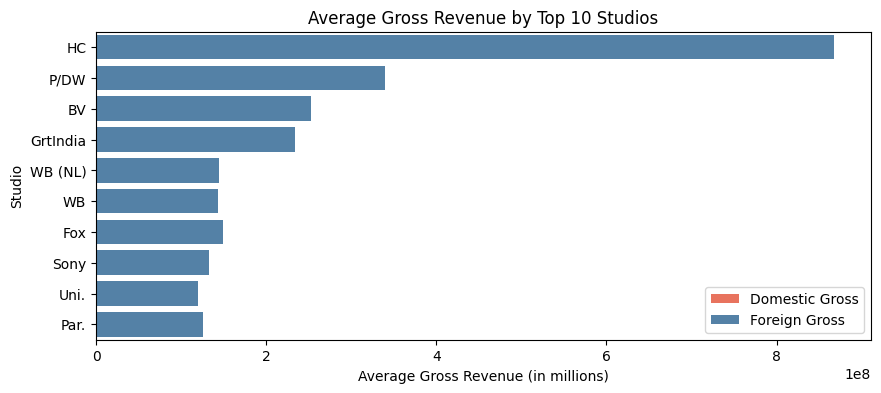

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by studio and calculate average domestic and foreign gross revenue
average_gross_by_studio = bom_movie_cleaned.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().reset_index()

# Calculate the average total gross revenue
average_gross_by_studio['total_gross'] = average_gross_by_studio['domestic_gross'] + average_gross_by_studio['foreign_gross']

# Sort by total gross and select the top 10studios
top_10_studios = average_gross_by_studio.sort_values(by='total_gross', ascending=False).head(10)

# Plot average gross revenue by studio
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_studios, x='domestic_gross', y='studio', color='tomato', label='Domestic Gross')
sns.barplot(data=top_10_studios, x='foreign_gross', y='studio', color='steelblue', label='Foreign Gross')
plt.title('Average Gross Revenue by Top 10 Studios')
plt.xlabel('Average Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.legend()
plt.show()

The graph above highlights HC Studio as the leading revenue generator in both domestic and international markets, with P/DW and BV studios trailing behind as strong performers.

In [165]:
print(top_10_studios)

       studio  domestic_gross  foreign_gross   total_gross
108        HC    2.700000e+06   8.676000e+08  8.703000e+08
170      P/DW    1.682900e+08   3.393600e+08  5.076500e+08
36         BV    1.737644e+08   2.528809e+08  4.266453e+08
107  GrtIndia    2.020000e+07   2.340000e+08  2.542000e+08
245   WB (NL)    8.879333e+07   1.440682e+08  2.328615e+08
244        WB    8.691461e+07   1.435993e+08  2.305139e+08
93        Fox    8.051103e+07   1.496706e+08  2.301817e+08
213      Sony    7.761177e+07   1.328118e+08  2.104235e+08
236      Uni.    8.777138e+07   1.195374e+08  2.073087e+08
183      Par.    7.609773e+07   1.262062e+08  2.023040e+08


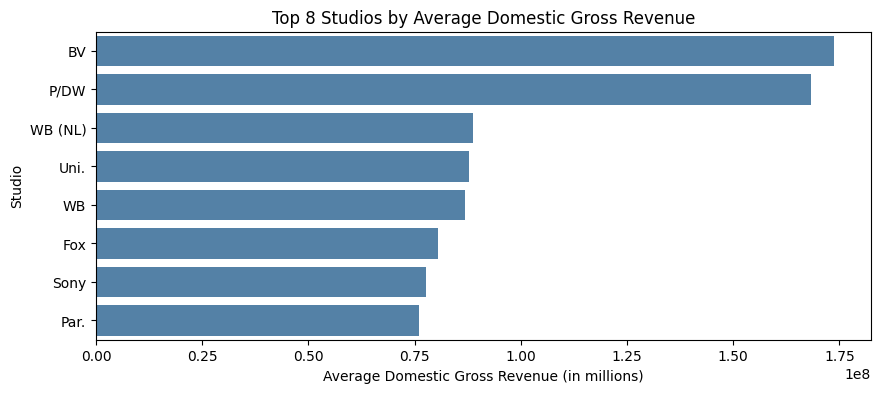

In [166]:
# Calculate the top 8 studios by domestic gross
top_8_domestic_gross_studios = average_gross_by_studio.sort_values(by='domestic_gross', ascending=False).head(8)

# Plot top 8 studios by domestic gross
plt.figure(figsize=(10, 4))
sns.barplot(data=top_8_domestic_gross_studios, x='domestic_gross', y='studio', color='steelblue')
plt.title('Top 8 Studios by Average Domestic Gross Revenue')
plt.xlabel('Average Domestic Gross Revenue (in millions)')
plt.ylabel('Studio')
plt.show()

BV studio leads as the most domestic revenue geneating studio with Par ans sony as as the least.

**Top 10 Highest Revenue Generating Movies**

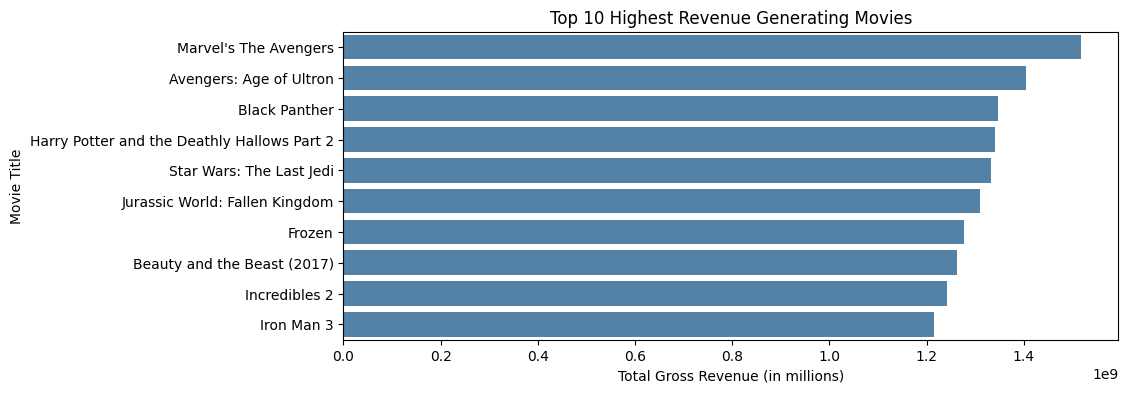

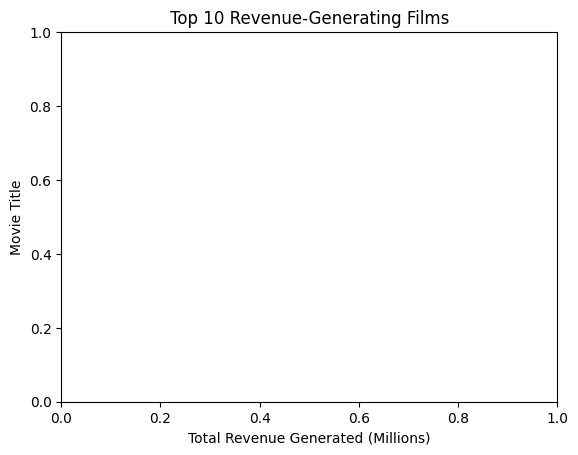

In [167]:
# Make a copy of the cleaned bom_movies data set, this is to help up introduce .loc without inferearing with the original cleaned data.
bom_movie_cleaned = bom_movie_cleaned.copy()

# Calculating total gross revenue
bom_movie_cleaned.loc[:, 'total_gross'] = bom_movie_cleaned['domestic_gross'] + bom_movie_cleaned['foreign_gross']

# Getting top 10 highest revenue generating movies
top_10_grossing_movies = bom_movie_cleaned.sort_values(by='total_gross', ascending=False).head(10)

# Plot top 10 highest revenue generating movies
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_grossing_movies, x='total_gross', y='title',color= 'steelblue')
plt.title('Top 10 Highest Revenue Generating Movies')
plt.xlabel('Total Gross Revenue (in millions)')
plt.ylabel('Movie Title')
plt.show()
plt.title('Top 10 Revenue-Generating Films')
plt.xlabel('Total Revenue Generated (Millions)')
plt.ylabel('Movie Title')
plt.show()

**Distribution of Gross Revenue**

Marvel's The Avengers stands out as the highest revenue-generating movie in both domestic and international markets.

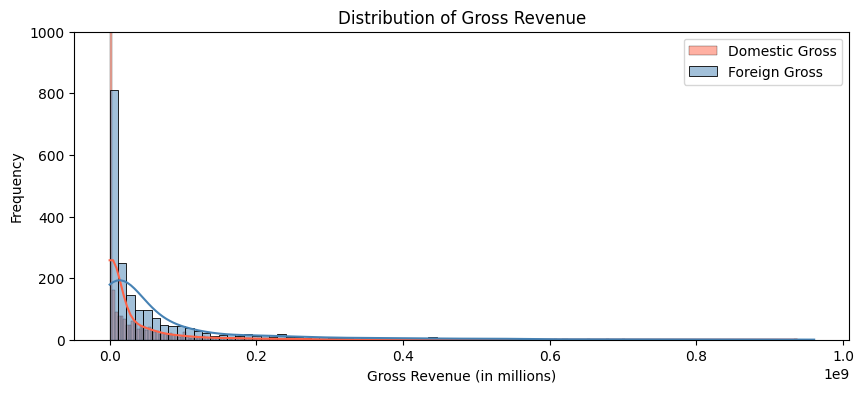

In [168]:
# Plot distribution of domestic and foreign gross revenue
plt.figure(figsize=(10, 4))
sns.histplot(bom_movie_cleaned['domestic_gross'], kde=True, color='tomato', label='Domestic Gross')
sns.histplot(bom_movie_cleaned['foreign_gross'], kde=True, color='steelblue', label='Foreign Gross')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue (in millions)')
plt.ylabel('Frequency')
plt.ylim(0, 1000)  # Set y-axis limits to be between 0 and 1000
plt.legend()
plt.show()

**We can see that foreign revenues have generally been higher than domestic revenues from movies, indicating a stronger international market appeal**

**Title Basics Data Analysis: Movie Runtime Distribution**

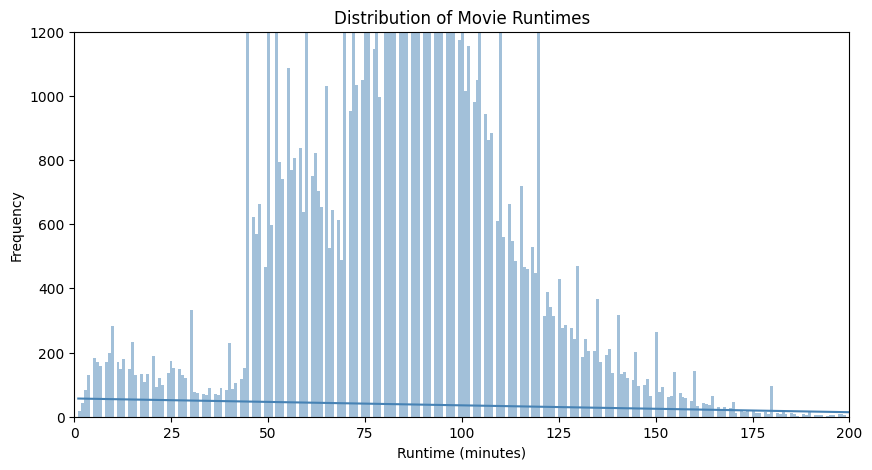

In [169]:
# Ploting distribution of movie runtimes
plt.figure(figsize=(10, 5))
sns.histplot(title_basics_cleaned['runtime_minutes'], kde=True, color='steelblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.ylim(0, 1200)  # Set y-axis limits to be between 0 and 1200
plt.xlim(0,200) #set the x- axis liiits to be betwee 0 and 200
plt.show()

 it is clear that the majority of movie runtimes fall between 70 and 120 minutes.

**Number of Movies Released per Year**

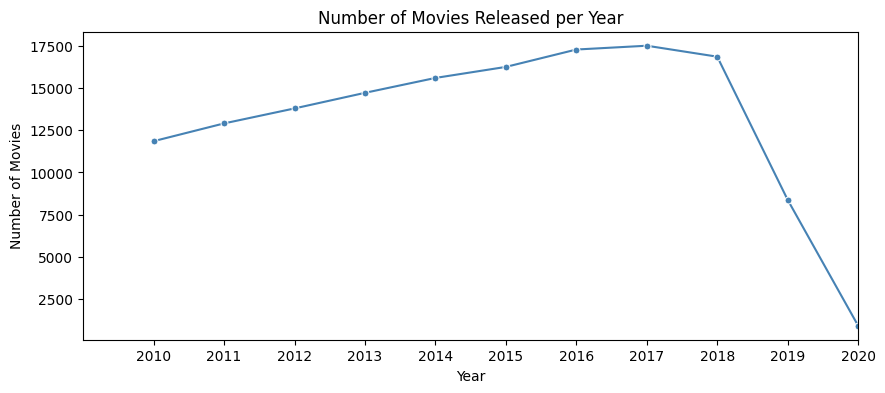

In [170]:
# Grouping by start year and count number of movies
movies_per_year = title_basics_cleaned.groupby('start_year').size().reset_index(name='count')

# Filtering the data to include only years from 2009 to 2020
movies_per_year = movies_per_year[(movies_per_year['start_year'] >= 2009) & (movies_per_year['start_year'] <= 2020)]

# Ploting the number of movies released per year
plt.figure(figsize=(10, 4))
sns.lineplot(data=movies_per_year, x='start_year', y='count', color='steelblue', marker='o',       # Adds dots on each data point
markersize=5)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Set x-axis limits to start from 2009 and end at 2020
plt.xlim(2009, 2020)

# Set x-axis ticks to only include the years present in the data
plt.xticks(movies_per_year['start_year'])

plt.show()

From the above graph, it can be deduced that the number of movies released each year has shown a steady and gradual increase since 2010.

**Top 10 Most Common Genres**

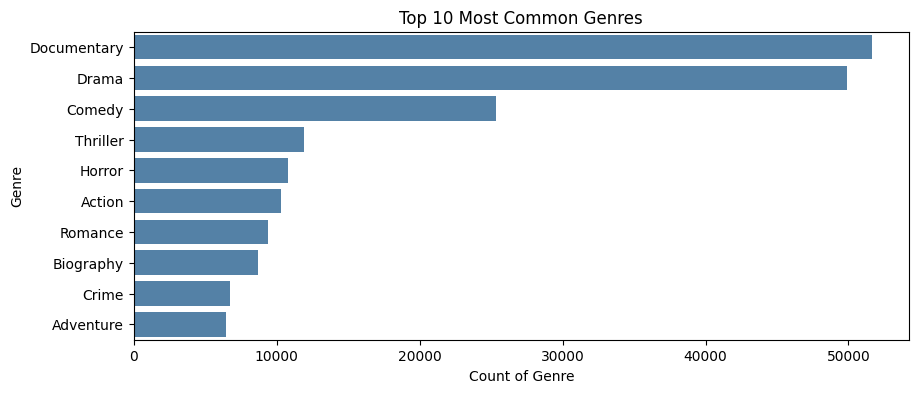

In [171]:
# Split genres and count occurrences,this is because some columns had more than one genres in entry
from collections import Counter

genres = title_basics_cleaned['genres'].str.split(',')
genres = genres.dropna().explode()
genre_counts = Counter(genres)

# Getting top 10 genres
top_10_genres = genre_counts.most_common(10)

# Converting top 10 genres to DataFrame for plotting
top_10_genres_df = pd.DataFrame(top_10_genres, columns=['genre', 'count'])

# Plotting top 10 genres
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_genres_df, x='count', y='genre',color ='steelblue')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count of Genre')
plt.ylabel('Genre')
plt.show()

The most popular movie genre is Documentary, followed by Drama, Comedy, and Thriller, respectively.

**Ratings by Genre**

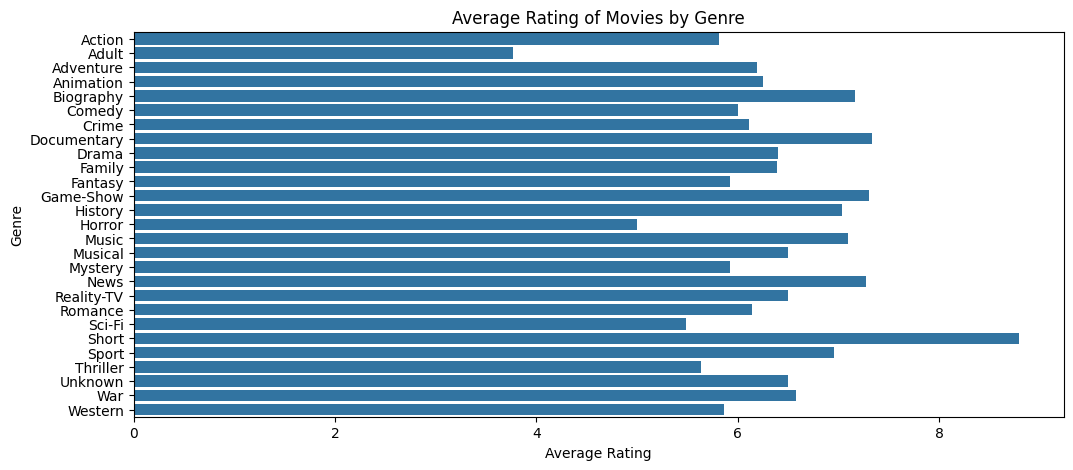

In [172]:
# Merging Title Basics with Ratings, this is because the data has a common column
plt.title_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

# Splitting genres and calculate average rating for each genre, this is because some columns have more than 2 entries of genre
genres_ratings = plt.title_merged[['genres', 'averagerating']].dropna()
genres_ratings['genres'] = genres_ratings['genres'].str.split(',')
genres_ratings = genres_ratings.explode('genres')

average_rating_by_genre = genres_ratings.groupby('genres')['averagerating'].mean().reset_index()

# Plot average rating by genre
plt.figure(figsize=(12, 5))
sns.barplot(data=average_rating_by_genre, x='averagerating', y='genres')
plt.title('Average Rating of Movies by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

From the above graph, the Short genre had the highest average rating, while Adult movies had the lowest. The majority of the genres had an average rating above 5.5.

**Title Ratings**

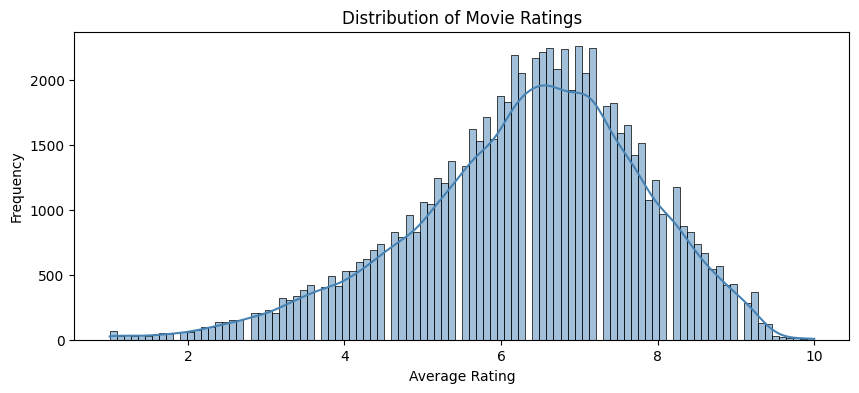

In [173]:
# Plotting the distribution of movie ratings
plt.figure(figsize=(10, 4))
sns.histplot(title_ratings['averagerating'], kde=True, color='steelblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

average rating for movies is normally distributed, with very few having the lowest ratings and few having the highest. The majority of movies had an average rating of 6 or above.

**Highest Rated Movies**

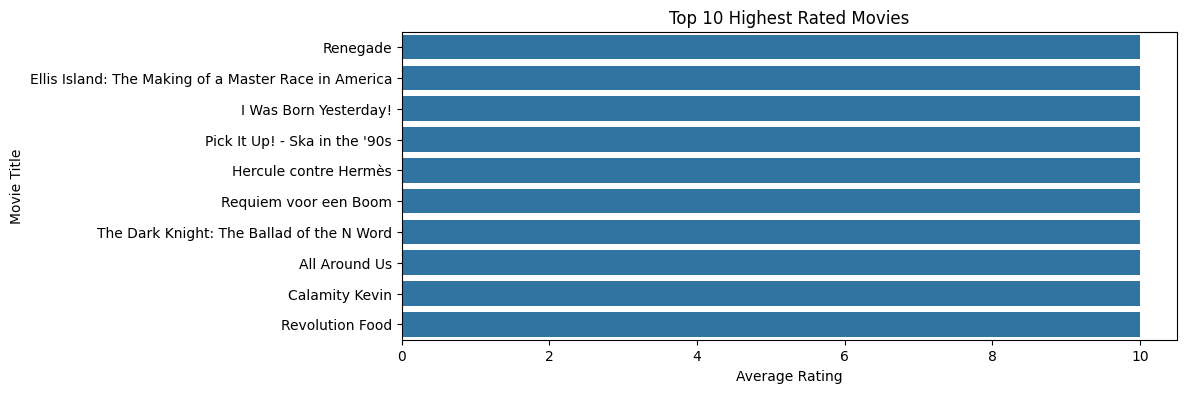

In [174]:
# Sorting movies by average rating
top_10_rated_movies = title_ratings.sort_values(by='averagerating', ascending=False).head(10)

# Merge with title basics to get movie titles
top_10_rated_movies = pd.merge(top_10_rated_movies, title_basics[['tconst', 'primary_title']], on='tconst')

# Plot top 10 highest rated movies
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10_rated_movies, x='averagerating', y='primary_title')
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()

**Least Rated Movies**

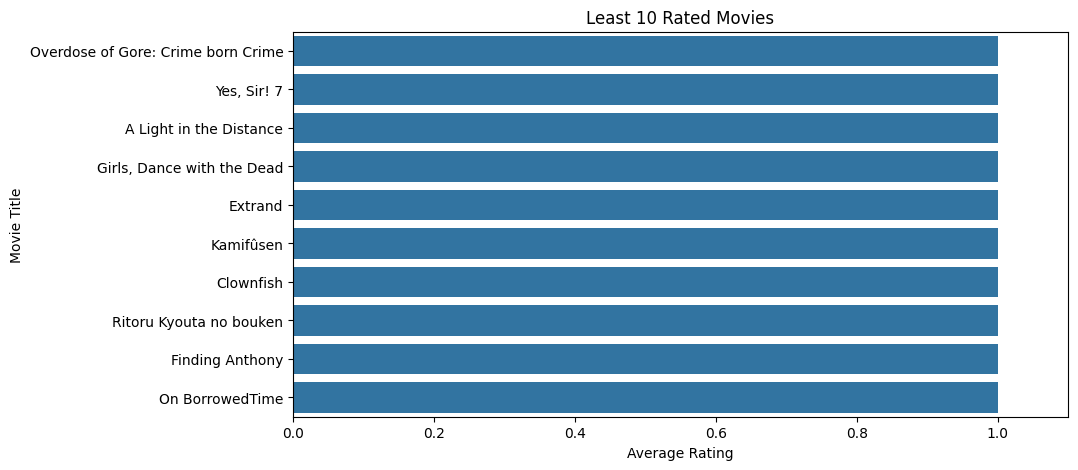

In [175]:
# Sorting movies by average rating in ascending order
least_10_rated_movies = title_ratings.sort_values(by='averagerating', ascending=True).head(10)

# Merge with title basics to get movie titles
least_10_rated_movies = pd.merge(least_10_rated_movies, title_basics[['tconst', 'primary_title']], on='tconst')

# Plot least 10 rated movies
plt.figure(figsize=(10, 5))
sns.barplot(data=least_10_rated_movies, x='averagerating', y='primary_title')
plt.title('Least 10 Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.xlim(0,1.1)
plt.show()

**Relationship between Number of votes and the Title Ratings of Movies**

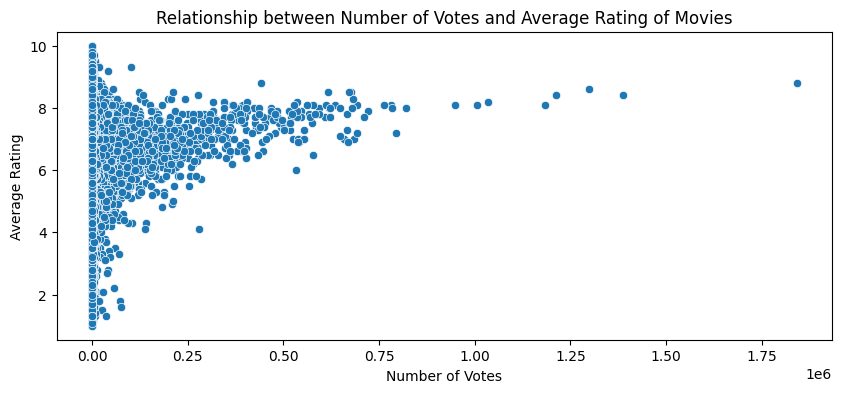

In [176]:
# Ploting correlation between number of votes and average rating
plt.figure(figsize=(10, 4))
sns.scatterplot(data=title_ratings, x='numvotes', y='averagerating')
plt.title('Relationship between Number of Votes and Average Rating of Movies')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

We can affirm that movies with the highest rating, received relatively higher number of votes.

**Average Rating over Time**

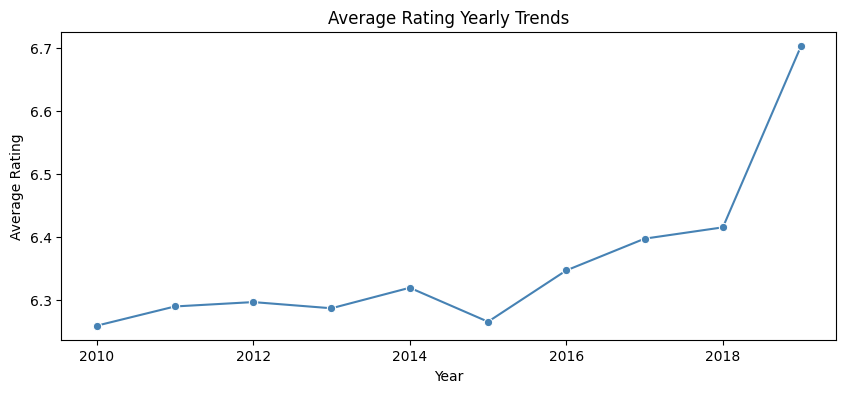

In [177]:
# Merging Title Basics with Ratings, this is because ratings and run time were in two different data sets
title_merged = pd.merge(title_basics_cleaned, title_ratings, on='tconst')

# Grouping by start year and calculate average rating
average_rating_by_year = title_merged.groupby('start_year')['averagerating'].mean().reset_index()

# Plotting average rating over time
plt.figure(figsize=(10, 4))
sns.lineplot(data=average_rating_by_year, x='start_year', y='averagerating', marker='o', color='steelblue')
plt.title('Average Rating Yearly Trends')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

The graph show average rating for movies has been on the rise over the years, suggesting improved storylines and better-produced films over time.

🎬 **Findings & Recommendations for Microsoft’s New Movie Studio**
As Microsoft ventures into film production, key data insights point to clear strategies for commercial and critical success:

1. **Focus on High-Grossing Genres**
Insight: Action, Adventure, and Sci-Fi consistently dominate box office revenue.

Recommendation: Prioritize these genres for strong financial returns. Include some Drama and Documentary titles to boost critical acclaim and showcase diversity.

2. **Optimize Runtime**
Insight: Most successful films fall within 90–120 minutes.

Recommendation: Target this runtime range and leverage audience testing to refine pacing.

3. **Leverage International Markets**
Insight: Foreign box office growth is outpacing domestic.

Recommendation: Develop international-focused campaigns, conduct regional market research, and align content with global trends.

4. **Learn from Top Studios**
Insight: Studios like Disney, Warner Bros., and Universal lead in average gross.

Recommendation: Analyze their strategies, consider collaborations, and adapt proven marketing/distribution tactics.

5. **Invest in Quality Content**
Insight: Low-rated films often lack strong narratives and budgets.

Recommendation: Hire skilled talent, enforce a robust script review process, and prioritize compelling storytelling.

